<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/W11_Artificial_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion minist

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


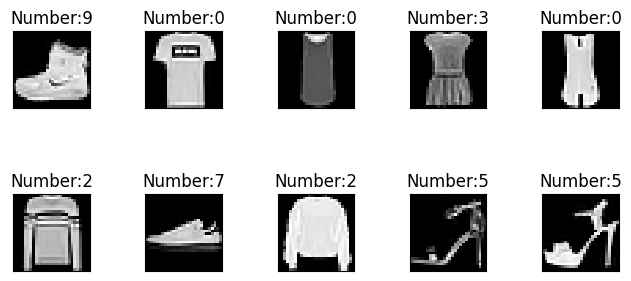

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow((x_train[i]),cmap='gray',
             interpolation='None')
  plt.title('Number:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

# OneHot-Encoding
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [3]:
y_test=to_categorical(y_test,10)
y_train=to_categorical(y_train,10)

In [4]:
print(y_test)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

In [15]:
# Convolutional Neural Network
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.layers.attention.multi_head_attention import activation
from keras.losses import categorical_crossentropy

model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

# Đổi ảnh sang vector
model.add(Flatten())

# Xây dụng ANN
model.add(Flatten()) # Đổi ảnh sang vector
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax')) # Xây dựng ANN full connectrion
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # Compile model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [17]:
train=model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Accuracy:',test_acc)

Epoch 1/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0937 - accuracy: 0.9663
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0876 - accuracy: 0.9687
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0847 - accuracy: 0.9688
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0802 - accuracy: 0.9710
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0780 - accuracy: 0.9718
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0725 - accuracy: 0.9742
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0722 - accuracy: 0.9737
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0666 - accuracy: 0.9762
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0632 - accuracy: 0.9775
Epoch 10/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0621 - accuracy: 0.9781

In [20]:
model.save('Fashion_mnist.h5')